# Support Vector Regression (SVR)

## Importing the libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:

#pd.set_option('max_columns', None)

import seaborn as sns

from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor


import warnings
warnings.filterwarnings('ignore')

## Importing the dataset

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/ds_1/Engineering_graduate_salary.csv')
dataset.head()

,ID,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,604399,f,1990-10-22,87.80,cbse,2009,84.00,cbse,6920,1,B.Tech/B.E.,instrumentation and control engineering,73.82,6920,1,Delhi,2013,650,665,810,0.694479,485,366,-1,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,988334,m,1990-05-15,57.00,cbse,2010,64.50,cbse,6624,2,B.Tech/B.E.,computer science & engineering,65.00,6624,0,Uttar Pradesh,2014,440,435,210,0.342315,365,-1,-1,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,301647,m,1989-08-21,77.33,"maharashtra state board,pune",2007,85.17,amravati divisional board,9084,2,B.Tech/B.E.,electronics & telecommunications,61.94,9084,0,Maharashtra,2011,485,475,505,0.824666,-1,400,-1,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,582313,m,1991-05-04,84.30,cbse,2009,86.00,cbse,8195,1,B.Tech/B.E.,computer science & engineering,80.40,8195,1,Delhi,2013,675,620,635,0.990009,655,-1,-1,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,339001,f,1990-10-30,82.00,cbse,2008,75.00,cbse,4889,2,B.Tech/B.E.,biotechnology,64.30,4889,1,Tamil Nadu,2012,575,495,365,0.278457,315,-1,-1,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000


In [ ]:
# lets take a glimpse of first five rows of the data
df = dataset
df.head().style.bar(
    color='#606ff2').background_gradient(cmap='plasma')

,ID,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,604399,f,1990-10-22,87.800000,cbse,2009,84.000000,cbse,6920,1,B.Tech/B.E.,instrumentation and control engineering,73.820000,6920,1,Delhi,2013,650,665,810,0.694479,485,366,-1,-1,-1,-1,-1,-0.159000,0.378900,1.239600,0.145900,0.288900,445000
1,988334,m,1990-05-15,57.000000,cbse,2010,64.500000,cbse,6624,2,B.Tech/B.E.,computer science & engineering,65.000000,6624,0,Uttar Pradesh,2014,440,435,210,0.342315,365,-1,-1,-1,-1,-1,-1,1.133600,0.045900,1.239600,0.526200,-0.285900,110000
2,301647,m,1989-08-21,77.330000,"maharashtra state board,pune",2007,85.170000,amravati divisional board,9084,2,B.Tech/B.E.,electronics & telecommunications,61.940000,9084,0,Maharashtra,2011,485,475,505,0.824666,-1,400,-1,-1,-1,260,-1,0.510000,-0.123200,1.542800,-0.290200,-0.287500,255000
3,582313,m,1991-05-04,84.300000,cbse,2009,86.000000,cbse,8195,1,B.Tech/B.E.,computer science & engineering,80.400000,8195,1,Delhi,2013,675,620,635,0.990009,655,-1,-1,-1,-1,-1,-1,-0.446300,0.212400,0.317400,0.272700,0.480500,420000
4,339001,f,1990-10-30,82.000000,cbse,2008,75.000000,cbse,4889,2,B.Tech/B.E.,biotechnology,64.300000,4889,1,Tamil Nadu,2012,575,495,365,0.278457,315,-1,-1,-1,-1,-1,-1,-1.499200,-0.747300,-1.069700,0.062230,0.186400,200000


In [ ]:
# checking shape of dataframe
df.shape

(2998, 34)

In [ ]:
# lets check for all the columns
df.columns

Index(['ID', 'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience', 'Salary'],
      dtype='object')

In [ ]:
# Data Description
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2998 entries, 0 to 2997
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     2998 non-null   int64  
 1   Gender                 2998 non-null   object 
 2   DOB                    2998 non-null   object 
 3   10percentage           2998 non-null   float64
 4   10board                2998 non-null   object 
 5   12graduation           2998 non-null   int64  
 6   12percentage           2998 non-null   float64
 7   12board                2998 non-null   object 
 8   CollegeID              2998 non-null   int64  
 9   CollegeTier            2998 non-null   int64  
 10  Degree                 2998 non-null   object 
 11  Specialization         2998 non-null   object 
 12  collegeGPA             2998 non-null   float64
 13  CollegeCityID          2998 non-null   int64  
 14  CollegeCityTier        2998 non-null   int64  
 15  Coll

## Taking care of missing data

In [ ]:
from sklearn.impute import SimpleImputer

# lets check for missing values
df.isnull().sum()

ID                       0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
nueroticism              0
openess_to_experience    0
Salary                   0
dtype: int64

In [ ]:
# summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2998.0,664892.583389,364895.076716,11244.0000,333464.750000,639694.500000,995177.000000,1.297877e+06
10percentage,2998.0,77.666264,10.002785,43.0000,71.140000,78.965000,85.600000,9.776000e+01
12graduation,2998.0,2008.080720,1.631814,1998.0000,2007.000000,2008.000000,2009.000000,2.012000e+03
12percentage,2998.0,74.341061,11.120299,40.0000,66.000000,74.000000,82.600000,9.870000e+01
CollegeID,2998.0,5210.210807,4776.609877,2.0000,526.250000,4027.500000,8822.250000,1.840900e+04
CollegeTier,2998.0,1.924616,0.264053,1.0000,2.000000,2.000000,2.000000,2.000000e+00
collegeGPA,2998.0,71.509857,8.122462,6.6300,66.530000,71.800000,76.300000,9.993000e+01
CollegeCityID,2998.0,5210.210807,4776.609877,2.0000,526.250000,4027.500000,8822.250000,1.840900e+04
CollegeCityTier,2998.0,0.296197,0.456655,0.0000,0.000000,0.000000,1.000000,1.000000e+00
GraduationYear,2998.0,2011.939960,36.780582,0.0000,2012.000000,2013.000000,2014.000000,2.017000e+03


In [ ]:
# CollegeGPA may contains some outlier values because the minimum and mean value are far away from each other. if it is the case, We can check it later in Data Visualization.
# We need to handle -1 value, so first we will simply convert it into NaN and then substitute mean/median inplace of NaN according to the requirement.

In [ ]:
# dropping features which do not make any sense to predict salary
df.drop(['ID', '10board','12graduation','12board' ,'CollegeID' , 'CollegeCityID','CollegeState'
                                     , 'CollegeCityTier', 'CivilEngg','TelecomEngg','ElectricalEngg',
         'MechanicalEngg','English', 'openess_to_experience'
         , 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism'], axis = 1, inplace = True)

In [ ]:
# lets check the shape again
df.shape

(2998, 16)

In [ ]:
#Data Cleaning

# fill missing values
df.replace(-1, np.NaN,inplace=True)

In [ ]:
# lets check the missing values again
df.isnull().sum()

Gender                      0
DOB                         0
10percentage                0
12percentage                0
CollegeTier                 0
Degree                      0
Specialization              0
collegeGPA                  0
GraduationYear              0
Logical                     0
Quant                       0
Domain                    179
ComputerProgramming       650
ElectronicsAndSemicon    2133
ComputerScience          2298
Salary                      0
dtype: int64

In [ ]:
# list of columns with null values
missing_values_columns = [col for col in df.columns if df.isnull().sum()[col] > 0]

In [ ]:
# function for missing values substitution
def fill_missing_values(df,missing_values_columns):
    data = df.copy()
    '''Filling missing values with mean'''
    for col in missing_values_columns:
        data[col] = data[col].fillna(data[col].mean())

    return data

# lets use this function to fill the missing values
df = fill_missing_values(df,missing_values_columns)

In [ ]:
# Exploratory Data Analysis #

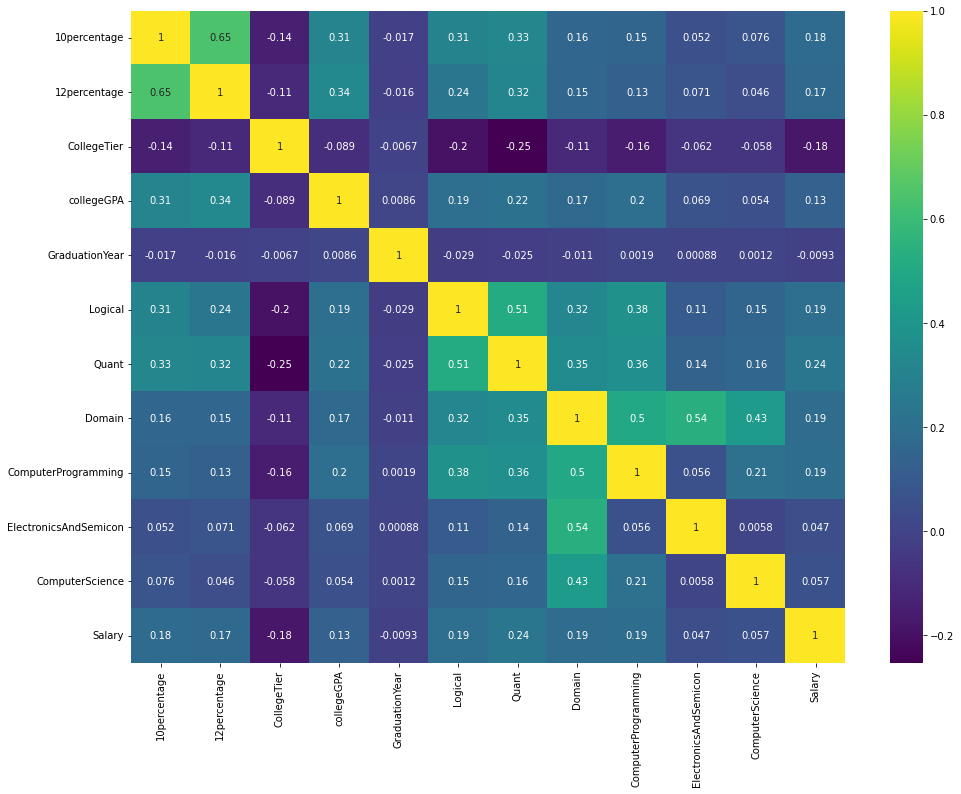

In [ ]:
# Correlation Analysis#
plt.figure(figsize=(16,12))
sns.heatmap(df.corr(),annot=True,cmap='viridis')
plt.show()

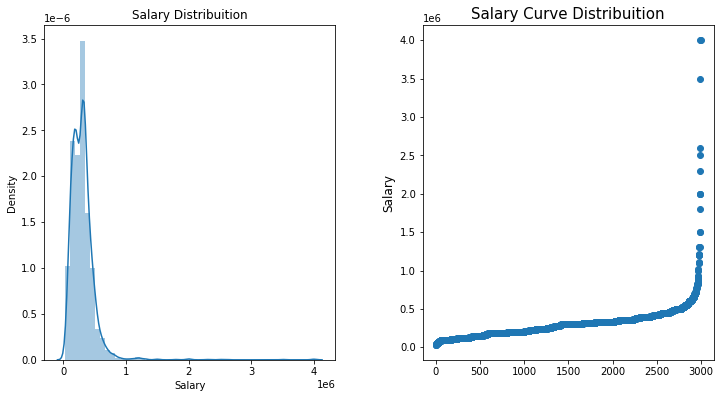

In [ ]:
# Analysis of Variable Salary

plt.figure(figsize = (12, 6))

plt.subplot(121)
plt.title('Salary Distribuition')
sns.distplot(df['Salary'])

plt.subplot(122)
g1 = plt.scatter(range(df.shape[0]), np.sort(df.Salary.values))
g1= plt.title("Salary Curve Distribuition", fontsize=15)
g1 = plt.xlabel("")
g1 = plt.ylabel("Salary", fontsize=12)

plt.subplots_adjust(wspace = 0.3, hspace = 0.5,
                    top = 0.9)
plt.show()

In [ ]:
# Most of the graduates having salaries under 10 lakhs.
# Long tail of distribution is longer on right hand side as compared to left hand side which shows that distribution is positively skewed.

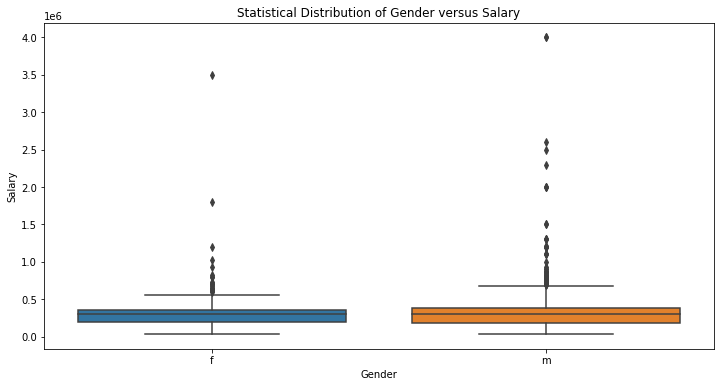

In [ ]:
# Analysis of Salary and Gender
plt.figure(figsize=(12,6))
sns.boxplot( x=df['Gender'], y=df['Salary'] )

plt.title('Statistical Distribution of Gender versus Salary')
plt.show()

In [ ]:
# It is clearly visible from the plot that the Average salary for man and woman are looking almost same.

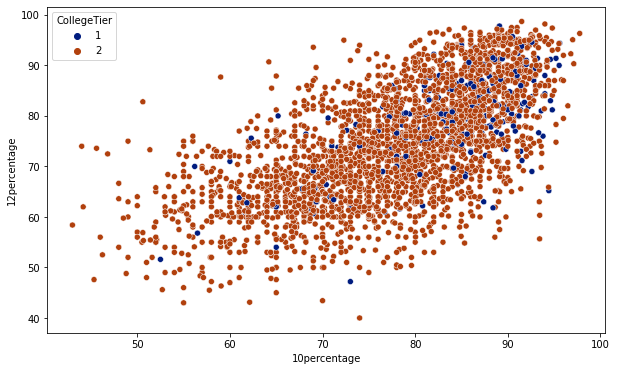

In [ ]:
# Analysis of 10th and 12th percentage by college tier

plt.figure(figsize=(10,6))
sns.scatterplot(x = '10percentage', y = '12percentage', hue = 'CollegeTier',palette='dark', data = df)
plt.show()

In [ ]:
# According to correlation plot and scatterplot, we can see that 10th and 12th are positively correlated, this is the case of multicollinearity so I have decided to keep only one.

In [ ]:
# Analysis of Salary and Specialization

# checking the count of unique specialization present in dataframe
df.Specialization.value_counts()

electronics and communication engineering      670
computer science & engineering                 557
information technology                         506
computer engineering                           415
computer application                           201
mechanical engineering                         155
electronics and electrical engineering         148
electronics & telecommunications                89
electrical engineering                          63
electronics & instrumentation eng               24
instrumentation and control engineering         18
electronics and instrumentation engineering     18
information science engineering                 18
civil engineering                               15
electronics engineering                         13
biotechnology                                   12
other                                           10
industrial & production engineering              8
chemical engineering                             7
mechanical and automation      

In [ ]:
# create the copy of dataframe
data = df.copy()
# count of unique categories in specialization
value_count = data['Specialization'].value_counts()

def map_to_other_specialization(var):
    ''' if count of unique category is less than 10, replace the category as other '''
    if var in value_count[value_count<=10]:
        return 'other'
    else:
        return var

# apply the function to specialization to get the results
df['Specialization'] = df.Specialization.apply(map_to_other_specialization)

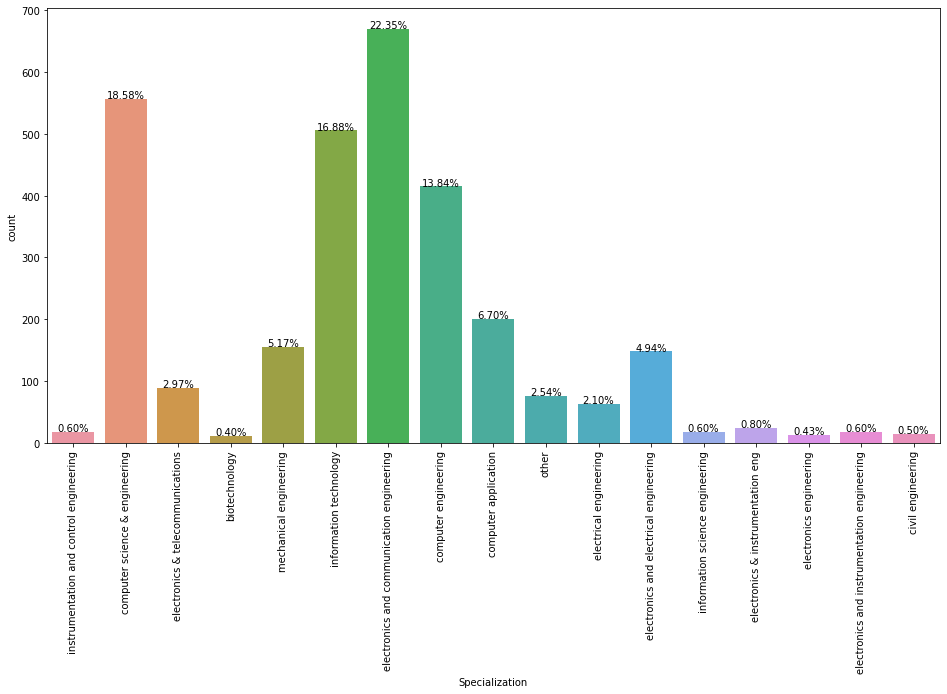

In [ ]:
# count plot of unique categories in specialization
plt.figure(figsize = (16, 8))
total = float(len(df))
ax = sns.countplot(x='Specialization',data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 1,
            '{:1.2f}%'.format((height/total) * 100),
            ha="center",fontsize=10)
plt.xticks(rotation = 90)
plt.show()

In [ ]:
# electronics & instrumentation engineering is repeating here with slight change in name so converting it into one category
df['Specialization'] = df['Specialization'].str.replace('electronics & instrumentation eng',\
                                                'electronics and instrumentation engineering')

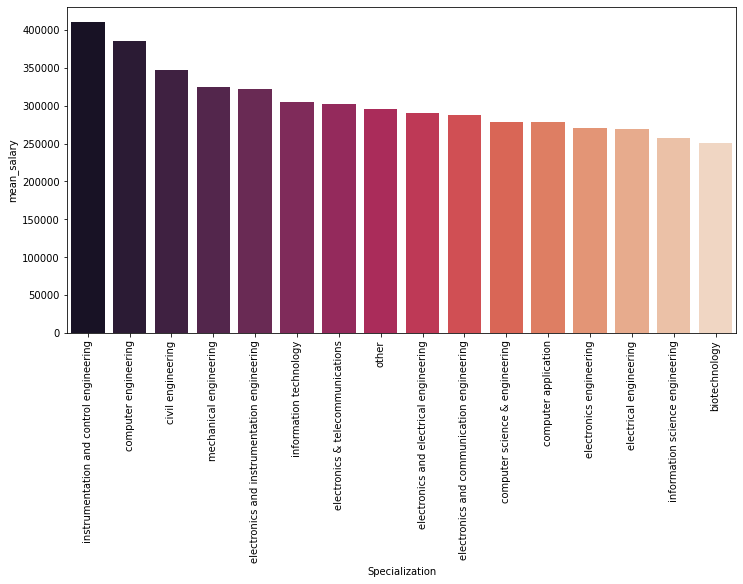

In [ ]:
# average salary by specialization and sort them in decreasing order
avg_sal_per_specialization = df.groupby('Specialization').agg(mean_salary =("Salary", 'mean')).sort_values(by = 'mean_salary',ascending=False)

# barplot of mean salary and specialization
plt.figure(figsize = (12, 6))
sns.barplot(x = avg_sal_per_specialization.index,y = 'mean_salary',data = avg_sal_per_specialization,palette='rocket')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
# ICE Engineer, Computer Engineer and Electronics Engineer having highest mean salary.

In [ ]:
# Analysis of Salary and College GPA #

# interesting insights
df[df['Salary'] == df.Salary.max()]

,Gender,DOB,10percentage,12percentage,CollegeTier,Degree,Specialization,collegeGPA,GraduationYear,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,Salary
2295,m,1987-09-09,90.83,88.77,1,B.Tech/B.E.,computer engineering,72.6,2010,685,585,0.990009,655.0,335.982659,406.501429,4000000
2964,m,1987-09-13,53.00,61.00,2,MCA,computer application,65.0,2010,455,475,0.525923,415.0,335.982659,406.501429,4000000


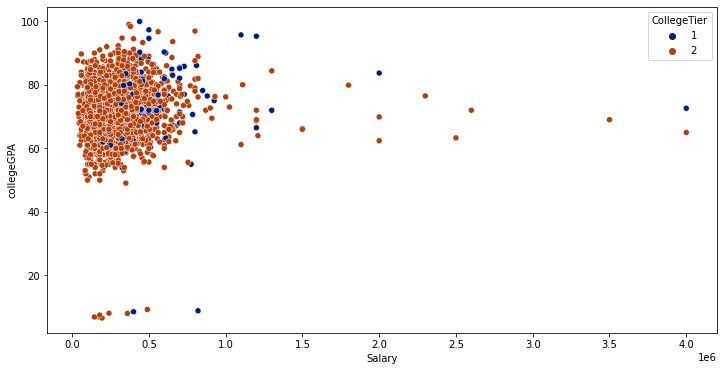

In [ ]:
# lets plot collegeGPA as we noticed in summary statistics
plt.figure(figsize = (12, 6))
sns.scatterplot(x ='Salary', y = 'collegeGPA',hue='CollegeTier',data=df,palette = 'dark')
plt.show()

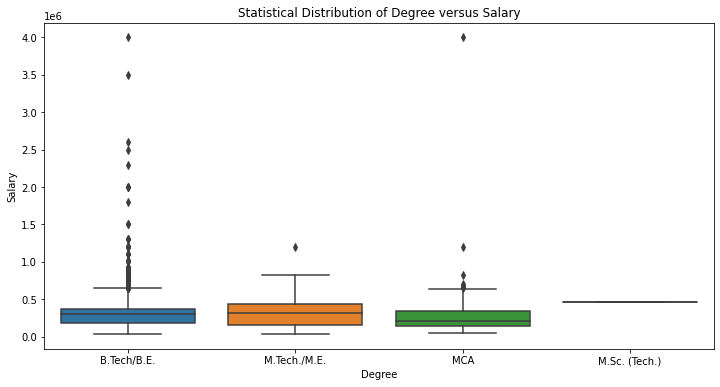

In [ ]:
# Analysis of Salary and Degree

plt.figure(figsize=(12,6))
sns.boxplot( x=df['Degree'], y=df['Salary'] )

plt.title('Statistical Distribution of Degree versus Salary')
plt.show()

In [ ]:
df['Degree'].value_counts()

B.Tech/B.E.      2757
MCA               200
M.Tech./M.E.       40
M.Sc. (Tech.)       1
Name: Degree, dtype: int64

In [ ]:
# Average salary is highest for BE/B.tech graduates as compared to any other degree graduates.

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR0 = Q3 - Q1

for i in IQR0.index:
    Q1 = df[i].quantile(q = 0.25)
    Q3 = df[i].quantile(q = 0.75)

    IQR = Q3 - Q1
    print(IQR)
    upper_limit= Q3 + (1.5*IQR)
    lower_limit= Q1 - (1.5*IQR)
    df[i] = np.where(df[i] <lower_limit ,lower_limit,df[i])
    df[i] = np.where(df[i] > upper_limit,upper_limit,df[i])

14.459999999999994
16.599999999999994
0.0
9.769999999999996
2.0
123.75
165.0
0.4580602748094185
90.0
0.0
0.0
190000.0


## Encoding categorical data

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

# creating list of categorical columns for one hot encoding
categorical_columns = [col for col in df.columns if df.dtypes[col] == 'object']

# creating list of numerical columns to standardized data
numerical_columns = [col for col in df.columns if (df.dtypes[col] != 'object')]

print('Numerical Features are : ',numerical_columns)
print('\n')
print('Categorical Features are : ',categorical_columns)

Numerical Features are :  ['10percentage', '12percentage', 'CollegeTier', 'collegeGPA', 'GraduationYear', 'Logical', 'Quant', 'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience', 'Salary']


Categorical Features are :  ['Gender', 'DOB', 'Degree', 'Specialization']


In [ ]:
# remove DOB & Graduation year from categorical features list

# items to be romoved


unwanted_cat = ['DOB','GraduationYear']
categorical_columns = [ele for ele in categorical_columns if ele not in unwanted_cat]
print(categorical_columns)

['Gender', 'Degree', 'Specialization']


In [ ]:
# Handling Datetime feature

# lets convert DOB & Graduation year to datetime
df['DOB'] = pd.to_datetime(df['DOB'])
df['GraduationYear'] = pd.to_datetime(df['GraduationYear'])

In [ ]:
# lets create a new feature BirthYear which is important if you want to see, how old the candidate was when he/she completed degree.

df['birth_year'] = df['DOB'].dt.year

df['GraduationYear'] = df['GraduationYear'].dt.year

# lets drop DOB
df.drop('DOB',axis=1,inplace=True)
df.drop('GraduationYear',axis=1,inplace=True) # HERE!1
del numerical_columns[4]


In [ ]:
# OneHotEncoding for Categorical Features #

In [ ]:
# one hot encoding function for categorical features
def onehot_encoder(df, cols):
    df = df.copy()
    for col in cols:
        df[col] = LabelEncoder().fit_transform(df[col])


        #dummies = pd.get_dummies(df[col])
        ## concatenating dummies and original dataframe
        #df = pd.concat([df, dummies], axis=1)

        # dropping original coolumns for which encoding is applied.
        #df.drop(col, axis=1,inplace=True)
    scaler = StandardScaler()
    cat_Standartization = pd.DataFrame(scaler.fit_transform(df[cols]), columns=cols)
    numerical_ix = df.select_dtypes(include=[np.number]).columns.tolist()
    num_Standartization = pd.DataFrame(scaler.fit_transform(df[numerical_ix]), columns=numerical_ix)
    df = pd.concat([num_Standartization, cat_Standartization], axis=1)
    return df

In [ ]:
df = onehot_encoder(df,categorical_columns)

In [ ]:
# lets drop one column from each encoded categorical feature to avoid dummy trap
# df.drop(['f','M.Sc. (Tech.)','biotechnology'],axis=1,inplace=True)

In [ ]:
# rename the gender column
df.rename({'m':'Gender'},axis=1,inplace=True)

In [ ]:
# Handling Numerical Features #

df[numerical_columns].head()

,10percentage,12percentage,CollegeTier,collegeGPA,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,Salary
0,1.016186,0.868785,0.0,0.299829,1.892646,2.432643,0.340685,0.443759,-5.684342e-14,0.0,1.094253
1,-2.076659,-0.885233,0.0,-0.902733,-0.754060,-2.500658,-0.988875,-1.070325,-5.684342e-14,0.0,-1.328135
2,-0.035181,0.974026,0.0,-1.319948,-0.293763,-0.075118,0.832193,-0.003481,-5.684342e-14,0.0,-0.279638
3,0.664726,1.048685,0.0,1.196978,1.374812,0.993763,1.456425,2.273276,-5.684342e-14,0.0,0.913478
4,0.433767,0.059238,0.0,-0.998174,-0.063615,-1.226222,-1.229963,-1.701193,-5.684342e-14,0.0,-0.677344


In [ ]:
# lets remove collegeTier from numerical features list because it is binary variable
# drop salary and GraduationYear
# items to be romoved
unwanted_num = ['CollegeTier','Salary','GraduationYear']
numerical_columns = [ele for ele in numerical_columns if ele not in unwanted_num]
print(numerical_columns)

['10percentage', '12percentage', 'collegeGPA', 'Logical', 'Quant', 'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience']


In [ ]:
# Split df into dependent(y) and indepedent variables(X)
X = df.drop('Salary',axis=1)
y = df['Salary']

## Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [ ]:
# Scaling Numerical Features

sc = StandardScaler()
X_train[numerical_columns] = sc.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = sc.transform(X_test[numerical_columns])

## Training the SVR model on the whole dataset

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import r2_score

svr = SVR(kernel = 'rbf', C=1, gamma = 0.1,epsilon=0.1)
#svr = SVR()
svr.fit(X_train, y_train)
svr_pred = svr.predict(X_test)


#linear_reg = LinearRegression()
#linear_reg.fit(X_train, y_train)
#y_pred_linear_reg = linear_reg.predict(X_test)

svr_score = svr.score(X_test, y_test)


## Visualising the SVR results

In [ ]:
print("SVR Score: {:.4f}".format(svr_score))

SVR Score: 0.2037


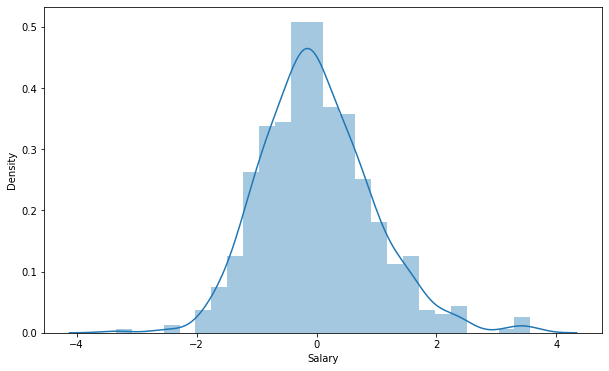

In [ ]:
# Linear Regression Error plot
errors_reg = y_test - svr_pred

plt.figure(figsize = (10,6))
sns.distplot(errors_reg)
plt.show()

# Conclusion
Write Your Conclusion hear:

In [ ]:
# We removed columns that only show areas/id plus attributes that show the workers personality,
# here we decided to get rid of them because we want to check more the technical skills influence on the salary.
# Of course we did some more changes on the data, and our SVM perdicted very good the salary.